## Report: Exploratory Data Analysis and Visualizations

This document communicates all the insights and displays the visualizations produced from my wrangled data.

---

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [2]:
master_clean = pd.read_csv('data/twitter_archive_master.csv')

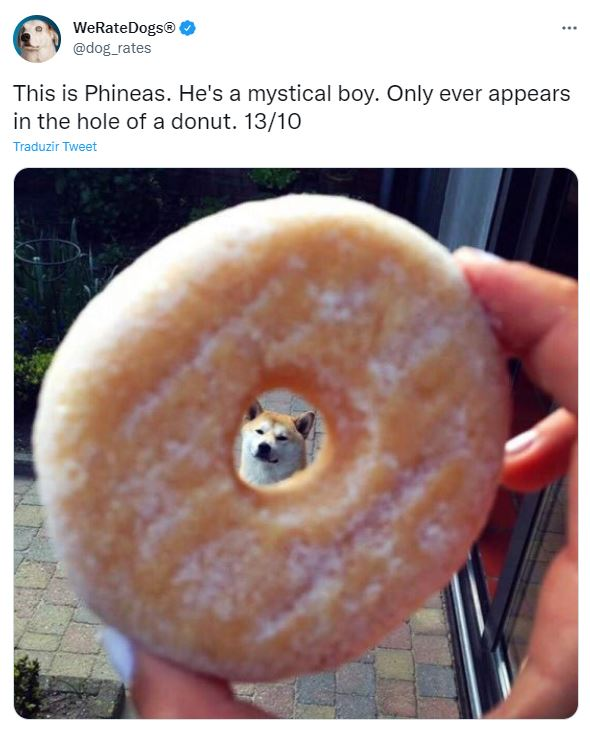

In [3]:
# I spent so much time with this dataset it feels Phineas is my personal friend
Image('data/Screenshot_892420643555336193.jpg')

Once the master dataset was cleaned, I moved on to a brief exploratory data analysis.

With the information available, I came up with three research questions:

### **`1.`** What are the 5 most common dog breeds in terms of sum of favorited tweets?

The top 5 most favorited breeds are: *Golden Retriever, Labrador Retriever, Pembroke, Chihuahua, and Samoyed*.

This insight was only possible after piercing together and cleaning the master dataset. I had to group by dog breed and then get the sum of favorited tweets. Both of those columns were originally in separate datasets.

The Golden Retriever sits comfortably in the Top 1. Further analysis could entail figuring out whether it was the most favorited dog breed simply due to the fact a disproportionate amount of tweets picture a dog from this breed.

For this visualization, I grouped by dog breed and found the amount of times tweets with a specific dog breed was favorited. 

In [4]:
# creating a function to generate bar charts and avoid repeating code unnecessarily
def chart(input):
    fig, ax = plt.subplots()
    ax = input.plot(kind='bar')
    ax.yaxis.set_major_formatter('{x:,.0f}')

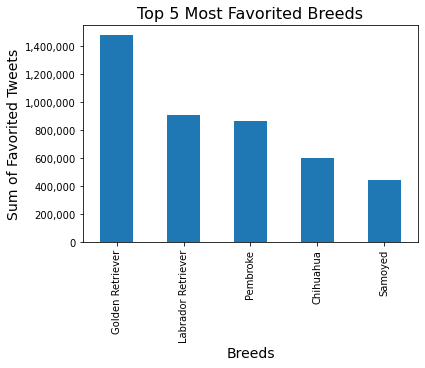

In [5]:
# group by the dog breed and sum the number of times 
# a given tweet with that breed was favorited 
top_breeds = master_clean.groupby('p1')['favorite_count'].sum().sort_values(ascending=False)
top_breeds

# plotting bar chart for insight #1
chart(top_breeds.iloc[:5])
plt.title('Top 5 Most Favorited Breeds', fontsize=16)
plt.xlabel('Breeds', fontsize=14);
plt.ylabel('Sum of Favorited Tweets', fontsize=14);

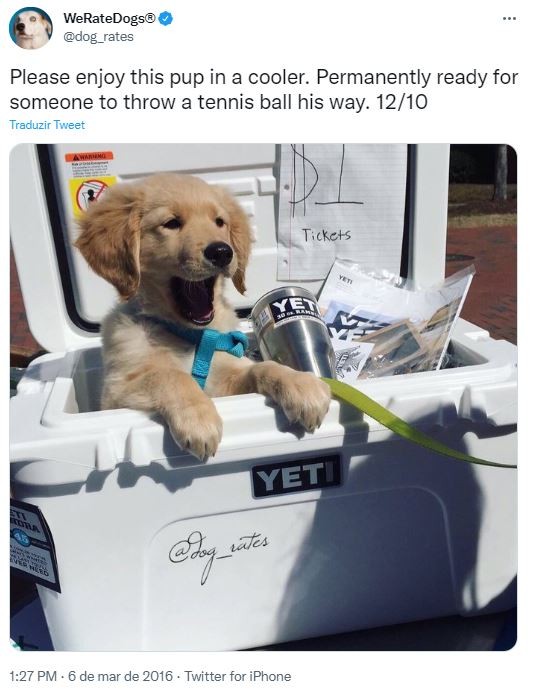

In [6]:
# well... I'd hit the heart button or retweet this pup anytime
Image('data/Screenshot_706516534877929472.jpg')

### **`2.`** Does the dog stage influence the number of interactions a tweet receive (favorites and retweets)?

According to WeRateDog's dogtionary, the four dog stages are: doggo, pupper, puppo and floofer. 

One might think that puppers (small dogs, usually younger) get the most interactions, but the data suggests that the number of interactions puppers received are almost the same as doggos (a big pupper, usually older). 

In a distant third, comes the puppos (a transitional phase between puppo and doggos). Lastly, the floofers (any dogs with seemingly excess fur). 

As a limitation, it's worth mentioning that only a small number of tweets from the sample included the dog stage. If we had dog stage information for the whole sample, the results might have been different. 

This analysis was only possible after tidying the dog stage columns and turning them into one.

For this visualization, I grouped by dog breed and got the sum of what I called interactions. For the purpose of this analysis, interactions are the sum of the amount of times a tweet was favorited and the amount of times a tweet was retweeted. 

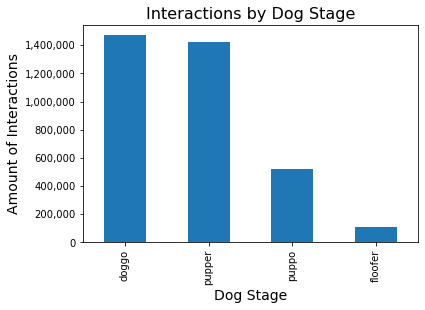

In [7]:
# create a column called 'interactions'
# representing the amount of times a tweet was 
# both favorited and retweeted
master_clean['interactions'] = master_clean['favorite_count'] + master_clean['retweet_count']

# group by the dog stage and get the sum of interactions
rating_influence = master_clean.groupby(['dog_stage'])['interactions'].sum().sort_values(ascending=False)
rating_influence

# plotting bar chart for insight #2
chart(rating_influence)
plt.title('Interactions by Dog Stage', fontsize=16)
plt.xlabel('Dog Stage', fontsize=14);
plt.ylabel('Amount of Interactions', fontsize=14);

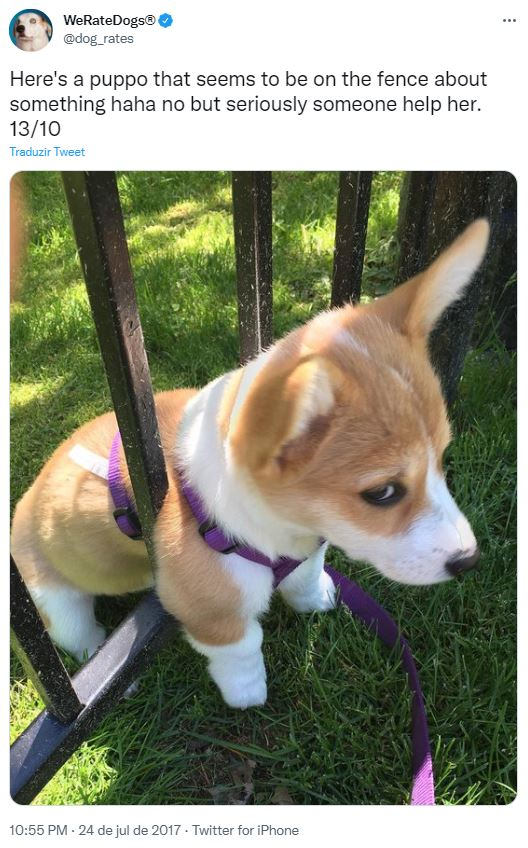

In [8]:
# puppos might have come in third in the analysis, 
# but this one deserve the world
Image('data/Screenshot_889665388333682689.jpg')

### **`3.`** Does the average rating increase through time?

Although we only have tweet information from 2016 to 2017, the data seem to suggest the average rating for dogs is increasing through time. 

Without converting the timestamp column to datetime, this analysis wouldn't be possible.

For this visualization, I grouped by trimester and found the average rating for tweets with only one dog. Then, I plotted a line chart.

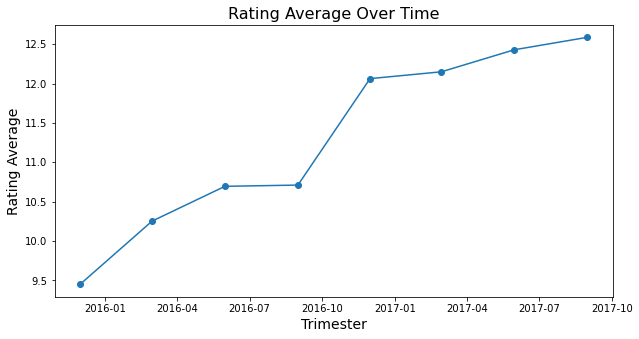

In [9]:
# for some reason, while importing the cleaned master dataset,
# the timestamp column was read as 'object' by pandas
# converting it again for the sake of this report
master_clean['timestamp'] = pd.to_datetime(master_clean['timestamp'])

# query just the rows in which the rating denominator is 10
# i.e., the tweets with only one dog in the picture,
# to remove the outliers
# then, resample by the trimester
# finally, get the mean rating for each trimester
trimesters = master_clean.query('rating_denominator == 10').resample('3M', on='timestamp')['rating_numerator'].mean()
trimesters

# plotting line chart
fig, ax = plt.subplots()
ax.plot(trimesters, 'o-')
fig.set_figheight(5)
fig.set_figwidth(10)
plt.title('Rating Average Over Time', fontsize=16)
plt.xlabel('Trimester', fontsize=14);
plt.ylabel('Rating Average', fontsize=14);

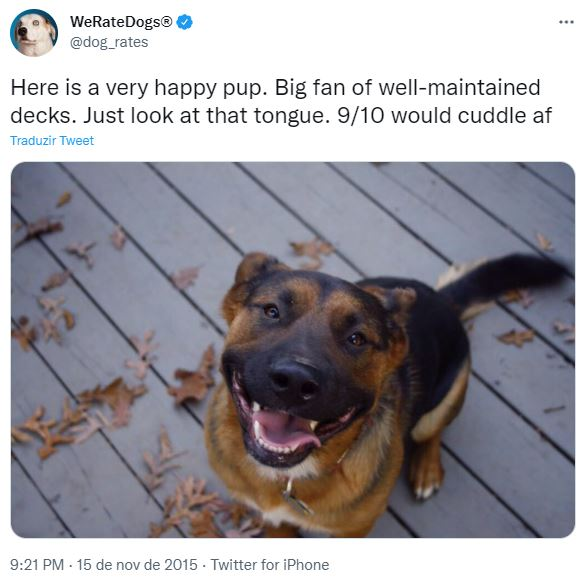

In [10]:
# ending the report with a little serotonin boost
Image('data/Screenshot_666033412701032449.jpg')